<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK6_%ED%95%84%EC%82%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [내용 정리]

## LightGBM

**리프 중심 트리 분할**(Leaf Wise) 방식 사용.
- 대부분은 균형 트리 분할(Level Wise) 사용.
- 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할함.

파이썬 패키지명: **lightgbm**
- 분류: LGBMClassifier / 회귀: LGBMRegressor

## LightGBM 설치

## LightGBM 하이퍼 파라미터
num_lterations

learning_rate

max_depth

min_data_in_leaf

num_leaves

boosting: gbdt/rt

bagging_fraction

feature_fraction

lambda_l2

lambda_l1

objective: Learning Task 파라미터

## 하이퍼 파라미터 튜닝 방안
num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하며 모델의 복잡도 줄이기.
- num_leaves의 개수 증가: 정확도 증가 but 트리 깊이 깊어짐, 모델 복잡도 커짐, 과적합 영향도 커짐.
- min_child_sample를 큰 값으로 설정 시 트리가 깊어지는 것을 방지.
- max_depth로 깊이의 크기를 제한.

learning_rate를 작게 하며 n_estimators를 크게 하기. - 너무 크게 할 시 과적합이 될 수 있음.

reg_lambda, reg_alpha와 같은 reqularization 적용, colsample_bytree, subsample 파라미터 적용.

## 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

## LightGBM 적용 - 위스콘신 유방암 예측

## 베이지안 최적화 개요

베이지안 최적화: 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식.
- 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 냄.
- **대체 모델**(Surrogate Model), **획득 함수**(Acquisition Function): 대체 모델은 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나가며, 획득 함수는 개선된 대체 모델을 기반으로 최적 입력값을 계산함.

베이지안 최적화 단계
1. 랜덤하게 하이퍼 파라미터를 샘플링한 뒤 성능 결과를 관측.
2. 관측된 값을 기반으로 대체 모델은 최적 함수를 추정.
3. 추정된 최적 함수를 기반으로 획득 함수는 다음으로 관측할 하이퍼 파라미터 값을 계산함. 이전 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달.
4. 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델 갱신, 다시 최적 함수를 예측 추정.
- 3, 4 과정을 특정 횟수만큼 반복하면 대체 모델의 불확실성이 개선되고 정확한 최적 함수 추정이 가능해짐.

## HyperOpt 사용하기

1. 입력 변수명과 입력값의 검색 공간(Search Space) 설정.
2. 목적 함수(Objective Function)의 설정.
3. **목적 함수의 반환 최솟값**을 가지는 최적 입력값을 유추.

입력값의 검색 공간을 제공하는 함수

*label: 입력 변수명, low: 최솟값, high: 최댓값, q: 간격*

**hp.quniform**(label, low, high, q): label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정.

**hp.uniform**(label,low, high): 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정.

**hp.randint**(label, upper): 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정.

**hp.loguniform**(label, low, high): exp(uniform(low, high))값을 반환하며, 반환 값의 log 변환된 값은 정규 분포 형태를 가지는 검색 공간 설정.

**hp.choice**(label, options): 검색값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion',['gini','entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력함.

fmin(objective, space, algo, max_evals, trials) 주요 인자

fn: objective_func과 같은 목적 함수

space: search_space와 같은 검색 공간 딕셔너리

algo: 베이지안 최적화 적용 알고리즘

max_evals: 최적 입력값을 찾기 위한 입력값 시도 횟수

trials: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용.

rstate: fmin()을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드 값.

## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

## 스태킹 앙상블

스태킹(Stacking): 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출 + 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행.
- 개별적인 기반 모델과 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어 학습하는 최종 메타 모델이 필요함.
- 개별 모델의 예측 데이터를 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만듦.

## 기본 스태킹 모델

## CV 세트 기반의 스태킹

과적합 개선을 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 **교차 검증** 기반으로 예측된 결과 데이터 세트를 이용.

1. 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성.
   - 학습용 데이터를 N개의 폴드로 나눔. 마지막 N번째 반복에서 개별 모델의 예측 값으로 학습 데이터와 테스트 데이터를 생성.

2. 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가.
   - 각 모델들이 1에서 생성한 학습과 테스트 데이터를 모두 합쳐 최종적으로 메타 모델이 사용할 학습 데이터와 테스트 데이터를 생성.

# [코드 필사]

## LightGBM

**리프 중심 트리 분할**(Leaf Wise) 방식 사용.
- 대부분은 균형 트리 분할(Level Wise) 사용.
- 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할함.

파이썬 패키지명: **lightgbm**
- 분류: LGBMClassifier / 회귀: LGBMRegressor

## LightGBM 설치

In [4]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd LightGBM
!mkdir build
%cd build
!cmake ../../LightGBM -DUSE_GPU=1
!make -j4
%cd ../python-package
!python3 setup.py install --gpu

Cloning into 'LightGBM'...
remote: Enumerating objects: 36551, done.
remote: Counting objects: 100% (713/713), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 36551 (delta 503), reused 222 (delta 221), pack-reused 35838 (from 5)
Receiving objects: 100% (36551/36551), 24.95 MiB | 20.55 MiB/s, done.
Resolving deltas: 100% (27064/27064), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21818, done.        
remote: Counting objects: 100% (45/45), done.        

In [1]:
# pip install lightgbm==3.3.2

In [30]:
import lightgbm
from lightgbm import LGBMClassifier

### LightGBM 하이퍼 파라미터

num_lterations

learning_rate

max_depth

min_data_in_leaf

num_leaves

boosting: gbdt/rt

bagging_fraction

feature_fraction

lambda_l2

lambda_l1

objective: Learning Task 파라미터

### 하이퍼 파라미터 튜닝 방안

num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하며 모델의 복잡도 줄이기.
- num_leaves의 개수 증가: 정확도 증가 but 트리 깊이 깊어짐, 모델 복잡도 커짐, 과적합 영향도 커짐.
- min_child_sample를 큰 값으로 설정 시 트리가 깊어지는 것을 방지.
- max_depth로 깊이의 크기를 제한.

learning_rate를 작게 하며 n_estimators를 크게 하기. - 너무 크게 할 시 과적합이 될 수 있음.

+ reg_lambda, reg_alpha와 같은 reqularization 적용, colsample_bytree, subsample 파라미터 적용.

## 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

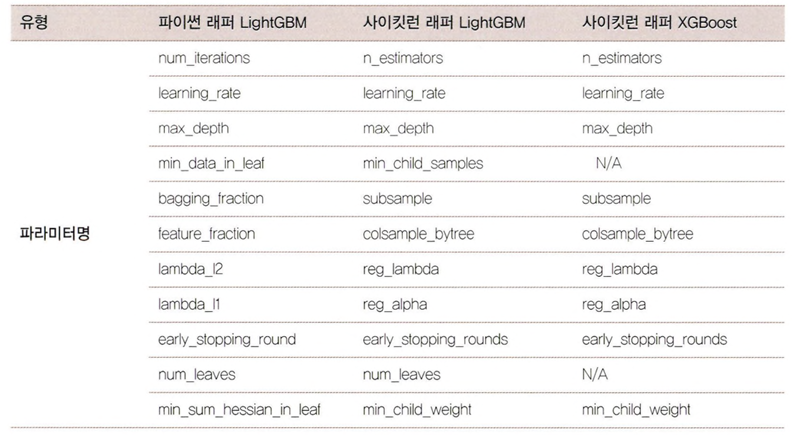

## LightGBM 적용 - 위스콘신 유방암 예측


In [31]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import lightgbm as lgb # Import lightgbm as lgb

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()

cancer_df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features=cancer_df.iloc[:,:-1]
y_label=cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper=LGBMClassifier(n_estimators=400,learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals=[(X_tr,y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,callbacks=[lgb.early_stopping(stopping_rounds=50,verbose=True),lgb.log_evaluation(period=10)],eval_metric="logloss",eval_set=evals)
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,-1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 251, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4092
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613692 -> initscore=0.462858
[LightGBM] [Info] Start training from score 0.462858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc=roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    print(confusion)
    #ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall,f1,roc_auc))

In [33]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율0.9740, F1:0.9677, AUC:0.9877


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

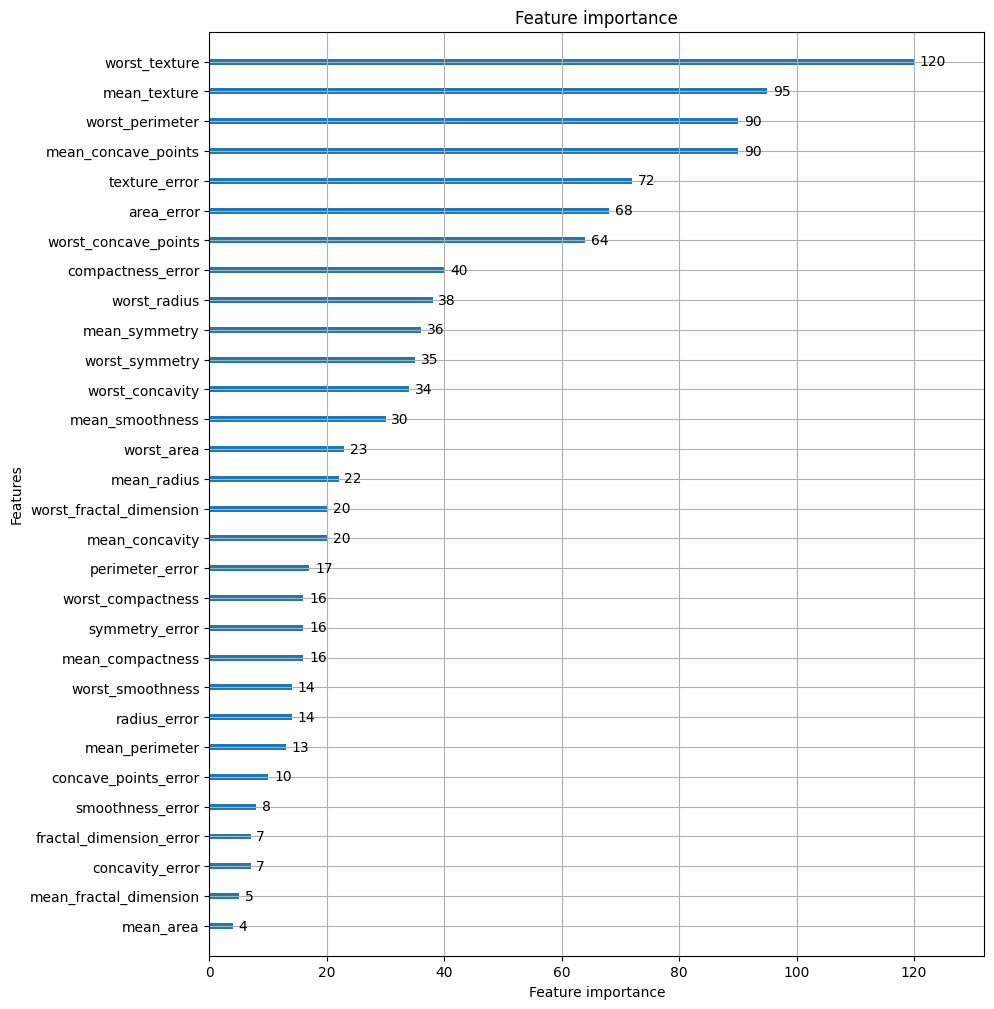

In [34]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

## 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

In [6]:
params={
    'max_depth':[10,20,30,40,50],'num_leaves':[35,45,55,65],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9],'subsample':[0.5,0.6,0.7,0.8,0.9],
    'min_child_weight':[10,20,30,40],'reg_alpha':[0.01,0.05,0.1]
}

## 베이지안 최적화 개요

베이지안 최적화: 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식.
- 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 냄.
- **대체 모델**(Surrogate Model), **획득 함수**(Acquisition Function): 대체 모델은 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나가며, 획득 함수는 개선된 대체 모델을 기반으로 최적 입력값을 계산함.

베이지안 최적화 단계
1. 랜덤하게 하이퍼 파라미터를 샘플링한 뒤 성능 결과를 관측.
2. 관측된 값을 기반으로 대체 모델은 최적 함수를 추정.
3. 추정된 최적 함수를 기반으로 획득 함수는 다음으로 관측할 하이퍼 파라미터 값을 계산함. 이전 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달.
4. 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델 갱신, 다시 최적 함수를 예측 추정.
- 3, 4 과정을 특정 횟수만큼 반복하면 대체 모델의 불확실성이 개선되고 정확한 최적 함수 추정이 가능해짐.

## HyperOpt 사용하기

In [7]:
pip install hyperopt

1. 입력 변수명과 입력값의 검색 공간(Search Space) 설정.
2. 목적 함수(Objective Function)의 설정.
3. **목적 함수의 반환 최솟값**을 가지는 최적 입력값을 유추.

In [8]:
from hyperopt import hp

# -10~10까지 1간격을 가지는 입력 변수 x와 -15~15까지 1간격으로 입력 변수 y 설정.
search_space={'x':hp.quniform('x',-10,10,1),'y':hp.quniform('y',-15,15,1)}

입력값의 검색 공간을 제공하는 함수

*label: 입력 변수명, low: 최솟값, high: 최댓값, q: 간격*

**hp.quniform**(label, low, high, q): label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정.

**hp.uniform**(label,low, high): 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정.

**hp.randint**(label, upper): 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정.

**hp.loguniform**(label, low, high): exp(uniform(low, high))값을 반환하며, 반환 값의 log 변환된 값은 정규 분포 형태를 가지는 검색 공간 설정.

**hp.choice**(label, options): 검색값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion',['gini','entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력함.

In [9]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
  x=search_space['x']
  y=search_space['y']
  retval=x**2-20*y

  return retval

fmin(objective, space, algo, max_evals, trials) 주요 인자

fn: objective_func과 같은 목적 함수

space: search_space와 같은 검색 공간 딕셔너리

algo: 베이지안 최적화 적용 알고리즘

max_evals: 최적 입력값을 찾기 위한 입력값 시도 횟수

trials: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용.

rstate: fmin()을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드 값.

In [10]:
from hyperopt import fmin,tpe,Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val=Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01=fmin(fn=objective_func,space=search_space,algo=tpe.suggest,max_evals=5,trials=trial_val,rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|██████████| 5/5 [00:00<00:00, 160.63trial/s, best loss: -224.0]
best: {'x': np.float64(-4.0), 'y': np.float64(12.0)}


In [11]:
trial_val=Trials()

# max_evals를 20회로 늘려서 재테스트
best_02=fmin(fn=objective_func,space=search_space,algo=tpe.suggest,max_evals=20,trials=trial_val,rstate=np.random.default_rng(seed=0))
print('best:',best_02)

100%|██████████| 20/20 [00:00<00:00, 130.20trial/s, best loss: -296.0]
best: {'x': np.float64(2.0), 'y': np.float64(15.0)}


In [12]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 변환값,'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [13]:
# Trials 객체의 vals 속성에 {'입력변수명': 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [np.float64(-6.0), np.float64(-4.0), np.float64(4.0), np.float64(-4.0), np.float64(9.0), np.float64(2.0), np.float64(10.0), np.float64(-9.0), np.float64(-8.0), np.float64(-0.0), np.float64(-0.0), np.float64(1.0), np.float64(9.0), np.float64(6.0), np.float64(9.0), np.float64(2.0), np.float64(-2.0), np.float64(-4.0), np.float64(7.0), np.float64(-0.0)], 'y': [np.float64(5.0), np.float64(10.0), np.float64(-2.0), np.float64(12.0), np.float64(1.0), np.float64(15.0), np.float64(7.0), np.float64(-10.0), np.float64(0.0), np.float64(-5.0), np.float64(-3.0), np.float64(2.0), np.float64(4.0), np.float64(10.0), np.float64(3.0), np.float64(3.0), np.float64(-14.0), np.float64(-8.0), np.float64(11.0), np.float64(-0.0)]}


In [14]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses=[loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df=pd.DataFrame({'x':trial_val.vals['x'],'y':trial_val.vals['y'],'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [15]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=156)

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=156)

In [16]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space={'max_depth':hp.quniform('max_depth',5,20,1),
                  'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                  'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                  'colsample_bytree':hp.uniform('colsample_bytree',0.5,1)}

In [17]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1*정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환.
def objective_func(search_space):
  # 수행 시간 절약을 위해 nestimators는 100으로 축소
  xgb_clf=XGBClassifier(n_estimators=100,max_depth=int(search_space['max_depth']),
                        min_child_weight=int(search_space['min_child_weight']),
                        learning_rate=search_space['learning_rate'],
                        colsample_bytree=search_space['colsample_bytree'],
                        eval_metric='logloss')
  accuracy=cross_val_score(xgb_clf,X_train,y_train,scoring='accuracy',cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss':-1*np.mean(accuracy),'status':STATUS_OK}

In [18]:
from hyperopt import fmin,tpe,Trials

trials_val=Trials()
best=fmin(fn=objective_func,
          space=xgb_search_space,
          algo=tpe.suggest,
          max_evals=50, # 최대 반복 횟수를 지정합니다.
          trials=trials_val,rstate=np.random.default_rng(seed=9))
print('best:',best)

100%|██████████| 50/50 [00:25<00:00,  1.97trial/s, best loss: -0.9648396653886372]
best: {'colsample_bytree': np.float64(0.6367020408228946), 'learning_rate': np.float64(0.17542594661299368), 'max_depth': np.float64(17.0), 'min_child_weight': np.float64(2.0)}


In [19]:
print('colsample_bytree:{0},learning_rate:{1},max_depth:{2},min_child_weight:{3}'.format(
    round(best['colsample_bytree'],5),round(best['learning_rate'],5),
    int(best['max_depth']),int(best['min_child_weight'])))

colsample_bytree:0.6367,learning_rate:0.17543,max_depth:17,min_child_weight:2


In [20]:
xgb_wrapper=XGBClassifier(n_estimators=400,
                          learning_rate=round(best['learning_rate'],5),
                          max_depth=int(best['max_depth']),
                          min_child_weight=int(best['min_child_weight']),
                          colsample_bytree=round(best['colsample_bytree'],5)
                          )

evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',
                eval_set=evals,verbose=True)

preds=xgb_wrapper.predict(X_test)
pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,preds,pred_proba)

[0]	validation_0-logloss:0.55232	validation_1-logloss:0.59166
[1]	validation_0-logloss:0.45267	validation_1-logloss:0.53027
[2]	validation_0-logloss:0.37707	validation_1-logloss:0.47056
[3]	validation_0-logloss:0.31784	validation_1-logloss:0.42540
[4]	validation_0-logloss:0.27052	validation_1-logloss:0.38484
[5]	validation_0-logloss:0.23321	validation_1-logloss:0.35497
[6]	validation_0-logloss:0.20155	validation_1-logloss:0.33684
[7]	validation_0-logloss:0.17642	validation_1-logloss:0.32440
[8]	validation_0-logloss:0.15404	validation_1-logloss:0.31093
[9]	validation_0-logloss:0.13779	validation_1-logloss:0.29666
[10]	validation_0-logloss:0.12276	validation_1-logloss:0.28419
[11]	validation_0-logloss:0.10784	validation_1-logloss:0.26580
[12]	validation_0-logloss:0.09695	validation_1-logloss:0.26392
[13]	validation_0-logloss:0.08880	validation_1-logloss:0.26499
[14]	validation_0-logloss:0.08150	validation_1-logloss:0.26178
[15]	validation_0-logloss:0.07502	validation_1-logloss:0.25834
[1

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.03770	validation_1-logloss:0.23827
[27]	validation_0-logloss:0.03571	validation_1-logloss:0.24004
[28]	validation_0-logloss:0.03428	validation_1-logloss:0.23786
[29]	validation_0-logloss:0.03272	validation_1-logloss:0.24211
[30]	validation_0-logloss:0.03147	validation_1-logloss:0.24210
[31]	validation_0-logloss:0.03045	validation_1-logloss:0.24117
[32]	validation_0-logloss:0.02911	validation_1-logloss:0.24580
[33]	validation_0-logloss:0.02850	validation_1-logloss:0.24404
[34]	validation_0-logloss:0.02767	validation_1-logloss:0.24115
[35]	validation_0-logloss:0.02689	validation_1-logloss:0.24143
[36]	validation_0-logloss:0.02626	validation_1-logloss:0.24367
[37]	validation_0-logloss:0.02567	validation_1-logloss:0.23778
[38]	validation_0-logloss:0.02503	validation_1-logloss:0.23946
[39]	validation_0-logloss:0.02451	validation_1-logloss:0.24368
[40]	validation_0-logloss:0.02424	validation_1-logloss:0.24175
[41]	validation_0-logloss:0.02375	validation_1-logloss:

## 스태킹 앙상블

스태킹(Stacking): 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출 + 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행.
- 개별적인 기반 모델과 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어 학습하는 최종 메타 모델이 필요함.
- 개별 모델의 예측 데이터를 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만듦.

## 기본 스태킹 모델

In [21]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data=load_breast_cancer()

X_data=cancer_data.data
y_label=cancer_data.target

X_train,X_test,y_train,y_test=train_test_split(X_data,y_label,test_size=0.2,random_state=0)

In [22]:
# 개별 ML 모델 생성
knn_clf=KNeighborsClassifier(n_neighbors=4)
rf_clf=RandomForestClassifier(n_estimators=100,random_state=0)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final=LogisticRegression()

In [24]:
# 개별 모델들을 학습.
knn_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
ada_clf.fit(X_train,y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [27]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
ada_pred=ada_clf.predict(X_test)
print('KNN 정확도:{0:.4f}'.format(accuracy_score(y_test,knn_pred)))
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))
print('결정 트리 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))
print('에이다부스트 정확도:{0:.4f}'.format(accuracy_score(y_test,ada_pred)))

KNN 정확도:0.9211
랜덤 포레스트 정확도:0.9649
결정 트리 정확도:0.9123
에이다부스트 정확도:0.9737


In [28]:
pred=np.array([knn_pred,rf_pred,dt_pred,ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred=np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [29]:
lr_final.fit(pred,y_test)
final=lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도:0.9737


## CV 세트 기반의 스태킹

과적합 개선을 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 **교차 검증** 기반으로 예측된 결과 데이터 세트를 이용.

1. 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성.
   - 학습용 데이터를 N개의 폴드로 나눔. 마지막 N번째 반복에서 개별 모델의 예측 값으로 학습 데이터와 테스트 데이터를 생성.

2. 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가.
   - 각 모델들이 1에서 생성한 학습과 테스트 데이터를 모두 합쳐 최종적으로 메타 모델이 사용할 학습 데이터와 테스트 데이터를 생성.

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model,X_train_n,y_train_n,X_test_n,n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf=KFold(n_splits=n_folds,shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred=np.zeros((X_train_n.shape[0],1))
  test_pred=np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,'model 시작')

  for folder_counter, (train_index,valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트:',folder_counter,'시작')
    X_tr=X_train_n[train_index]
    y_tr=y_train_n[train_index]
    X_te=X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr,y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index,:]=model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:,folder_counter]=model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean=np.mean(test_pred,axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred,test_pred_mean


In [45]:
# Convert pandas DataFrames/Series to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values

knn_train,knn_test=get_stacking_base_datasets(knn_clf,X_train_np,y_train_np,X_test_np,7)
rf_train,rf_test=get_stacking_base_datasets(rf_clf,X_train_np,y_train_np,X_test_np,7)
dt_train,dt_test=get_stacking_base_datasets(dt_clf,X_train_np,y_train_np,X_test_np,7)
ada_train,ada_test=get_stacking_base_datasets(ada_clf,X_train_np,y_train_np,X_test_np,7)

KNeighborsClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
DecisionTreeClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
AdaBoostClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작


In [46]:
Stack_final_X_train=np.concatenate((knn_train,rf_train,dt_train,ada_train),axis=1)
Stack_final_X_test=np.concatenate((knn_test,rf_test,dt_test,ada_test),axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape,'원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [47]:
lr_final.fit(Stack_final_X_train,y_train)
stack_final=lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도:0.9561
